In [690]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading CSVs Datasets.

In [641]:
Cab_Data= pd.read_csv("Cab_Data.csv")
Customer_Data= pd.read_csv("Customer_ID.csv")
Transaction_data= pd.read_csv("Transaction_ID.csv")
City_Data= pd.read_csv("City.csv")

## Merge the datasets

In [643]:
combined_df= pd.merge(Transaction_data, Customer_Data)

In [644]:
combined_df= pd.merge(combined_df, Cab_Data)

In [801]:
combined_df.head()

,Company,Customer ID,Gender,Age,City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode,Profit
1,Yellow Cab,29290,Male,28,ATLANTA GA,2018-07-21,26.19,317.42,598.70,Cash,281.28
2,Yellow Cab,29290,Male,28,ATLANTA GA,2018-11-23,42.55,597.40,792.05,Card,194.65
4,Yellow Cab,27703,Male,27,ATLANTA GA,2018-04-21,36.38,467.12,721.10,Card,253.98
5,Yellow Cab,27703,Male,27,ATLANTA GA,2018-05-04,6.18,87.51,138.40,Cash,50.89
6,Pink Cab,27703,Male,27,ATLANTA GA,2018-10-27,13.39,141.93,167.03,Card,25.10


In [802]:
City_Company= pd.merge(City_Data, Cab_Data, left_on="City", right_on=["City"])

In [803]:
City_Company.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,"8,405,837","302,149",10000139,2016-01-08,Pink Cab,17.85,242.90,198.14
1,NEW YORK NY,"8,405,837","302,149",10000140,2016-01-09,Pink Cab,25.30,407.21,255.53
2,NEW YORK NY,"8,405,837","302,149",10000141,2016-01-06,Pink Cab,16.32,236.41,186.05
3,NEW YORK NY,"8,405,837","302,149",10000142,2016-01-04,Pink Cab,12.43,194.61,144.19
4,NEW YORK NY,"8,405,837","302,149",10000143,2016-01-09,Pink Cab,29.70,434.57,350.46


# Reconstruct  and Clean the DataFrames

In [646]:
combined_df= combined_df[["Company", "Customer ID", "Transaction ID", "Gender", "Age", 
                              "Income (USD/Month)","City", "Date of Travel", 'KM Travelled', 'Cost of Trip',
                             'Price Charged', 'Payment_Mode']]

In [647]:
combined_df.head()

,Company,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode
0,Pink Cab,29290,10000011,Male,28,10813,ATLANTA GA,2016-01-08,30.45,313.64,370.95,Card
1,Yellow Cab,29290,10351127,Male,28,10813,ATLANTA GA,2018-07-21,26.19,317.42,598.70,Cash
2,Yellow Cab,29290,10412921,Male,28,10813,ATLANTA GA,2018-11-23,42.55,597.40,792.05,Card
3,Pink Cab,27703,10000012,Male,27,9237,ATLANTA GA,2016-01-06,28.62,334.85,358.52,Card
4,Yellow Cab,27703,10320494,Male,27,9237,ATLANTA GA,2018-04-21,36.38,467.12,721.10,Card


### Check and clean the dates range from 31/01/2016 to 31/12/2018

#### Change Date of Travel column type to datetime.

In [642]:
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])

In [648]:
combined_df = combined_df[combined_df["Date of Travel"]>= "1/31/2016"]

In [650]:
combined_df= combined_df.drop(['Income (USD/Month)'], axis = 1)

In [651]:
combined_df= combined_df.drop(['Transaction ID'], axis = 1)

In [652]:
combined_df.head()

,Company,Customer ID,Gender,Age,City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode
1,Yellow Cab,29290,Male,28,ATLANTA GA,2018-07-21,26.19,317.42,598.70,Cash
2,Yellow Cab,29290,Male,28,ATLANTA GA,2018-11-23,42.55,597.40,792.05,Card
4,Yellow Cab,27703,Male,27,ATLANTA GA,2018-04-21,36.38,467.12,721.10,Card
5,Yellow Cab,27703,Male,27,ATLANTA GA,2018-05-04,6.18,87.51,138.40,Cash
6,Pink Cab,27703,Male,27,ATLANTA GA,2018-10-27,13.39,141.93,167.03,Card


In [804]:
City_Company= City_Company.drop(['Transaction ID'], axis = 1)

In [ ]:
Transaction ID 	Date of Travel 	Company 	KM Travelled 	Price Charged 	Cost of Trip

In [805]:
City_Company= City_Company.drop(['Date of Travel'], axis = 1)

In [806]:
City_Company= City_Company.drop(['KM Travelled'], axis = 1)

In [807]:
City_Company= City_Company.drop(['Price Charged'], axis = 1)

In [808]:
City_Company= City_Company.drop(['Cost of Trip'], axis = 1)

In [818]:
City_Company.head()

,City,Population,Users,Company
0,NEW YORK NY,"8,405,837","302,149",Pink Cab
1,NEW YORK NY,"8,405,837","302,149",Pink Cab
2,NEW YORK NY,"8,405,837","302,149",Pink Cab
3,NEW YORK NY,"8,405,837","302,149",Pink Cab
4,NEW YORK NY,"8,405,837","302,149",Pink Cab


### Profit calculation

In [653]:
combined_df["Profit"]=combined_df["Price Charged"]-combined_df["Cost of Trip"]
combined_df

,Company,Customer ID,Gender,Age,City,Date of Travel,KM Travelled,Cost of Trip,Price Charged,Payment_Mode,Profit
1,Yellow Cab,29290,Male,28,ATLANTA GA,2018-07-21,26.19,317.42,598.70,Cash,281.28
2,Yellow Cab,29290,Male,28,ATLANTA GA,2018-11-23,42.55,597.40,792.05,Card,194.65
4,Yellow Cab,27703,Male,27,ATLANTA GA,2018-04-21,36.38,467.12,721.10,Card,253.98
5,Yellow Cab,27703,Male,27,ATLANTA GA,2018-05-04,6.18,87.51,138.40,Cash,50.89
6,Pink Cab,27703,Male,27,ATLANTA GA,2018-10-27,13.39,141.93,167.03,Card,25.10
...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,38520,Female,42,SEATTLE WA,2018-01-07,16.66,213.91,261.18,Card,47.27
359388,Yellow Cab,12490,Male,33,SILICON VALLEY,2018-01-03,13.72,172.87,277.97,Cash,105.10
359389,Yellow Cab,41414,Male,38,TUCSON AZ,2018-01-04,19.00,232.56,303.77,Card,71.21
359390,Yellow Cab,41677,Male,23,TUCSON AZ,2018-01-06,5.60,70.56,92.42,Cash,21.86


## Check for any null values

In [810]:
Cab_Data.shape

(359392, 7)

In [811]:
City_Data.shape

(20, 3)

In [812]:
Customer_Data.shape

(49171, 4)

In [813]:
Transaction_data.shape

(440098, 3)

In [654]:
combined_df.shape

(355032, 11)

In [656]:
combined_df[combined_df.columns].isnull().values.any()

False

In [657]:
combined_df.isnull().sum()

Company           0
Customer ID       0
Gender            0
Age               0
City              0
Date of Travel    0
KM Travelled      0
Cost of Trip      0
Price Charged     0
Payment_Mode      0
Profit            0
dtype: int64

In [658]:
combined_df.nunique()

Company                2
Customer ID        46020
Gender                 2
Age                   48
City                  19
Date of Travel      1066
KM Travelled         874
Cost of Trip       14759
Price Charged      98741
Payment_Mode           2
Profit            141407
dtype: int64

In [659]:
combined_df.duplicated().sum()

0

In [814]:
City_Company.isnull().sum()

City          0
Population    0
Users         0
Company       0
dtype: int64

In [815]:
City_Company.nunique()

City          19
Population    19
Users         19
Company        2
dtype: int64

In [816]:
City_Company[City_Company.columns].isnull().values.any()

False

## Exploring Data

In [718]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355032 entries, 1 to 359391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Company         355032 non-null  object        
 1   Customer ID     355032 non-null  int64         
 2   Gender          355032 non-null  object        
 3   Age             355032 non-null  int64         
 4   City            355032 non-null  object        
 5   Date of Travel  355032 non-null  datetime64[ns]
 6   KM Travelled    355032 non-null  float64       
 7   Cost of Trip    355032 non-null  float64       
 8   Price Charged   355032 non-null  float64       
 9   Payment_Mode    355032 non-null  object        
 10  Profit          355032 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 40.6+ MB


In [750]:
pd.crosstab(combined_df.Gender, combined_df.Company)

Company,Pink Cab,Yellow Cab
Gender,,
Female,37440,115634
Male,46385,155573


In [793]:
pd.crosstab(City_Company.City, City_Company.Company)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [739]:
pd.crosstab(index= combined_df["Payment_Mode"], columns=combined_df['Company'])

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50202,162677
Cash,33623,108530


In [667]:
combined_df.describe()

,Customer ID,Age,KM Travelled,Cost of Trip,Price Charged,Profit
count,355032.000000,355032.000000,355032.000000,355032.000000,355032.000000,355032.000000
mean,19172.348428,35.335933,22.566598,286.165113,422.742351,136.577238
std,21006.628869,12.593311,12.234181,157.997145,273.830796,159.790616
min,1.000000,18.000000,1.900000,19.000000,15.600000,-220.060000
25%,2698.000000,25.000000,12.000000,151.200000,206.160000,27.780000
50%,7453.000000,33.000000,22.440000,282.460000,385.870000,81.460000
75%,36012.000000,42.000000,32.960000,413.680000,582.692500,189.070000
max,60000.000000,65.000000,48.000000,691.200000,2048.030000,1463.970000


In [682]:
combined_df.quantile()

Customer ID      7453.00
Age                33.00
KM Travelled       22.44
Cost of Trip      282.46
Price Charged     385.87
Profit             81.46
Name: 0.5, dtype: float64

In [672]:
City_Data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SAN DIEGO CA,"1,595,037","17,675"
freq,1,1,1


array([[<AxesSubplot:title={'center':'Customer ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Date of Travel'}>],
       [<AxesSubplot:title={'center':'KM Travelled'}>,
        <AxesSubplot:title={'center':'Cost of Trip'}>,
        <AxesSubplot:title={'center':'Price Charged'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

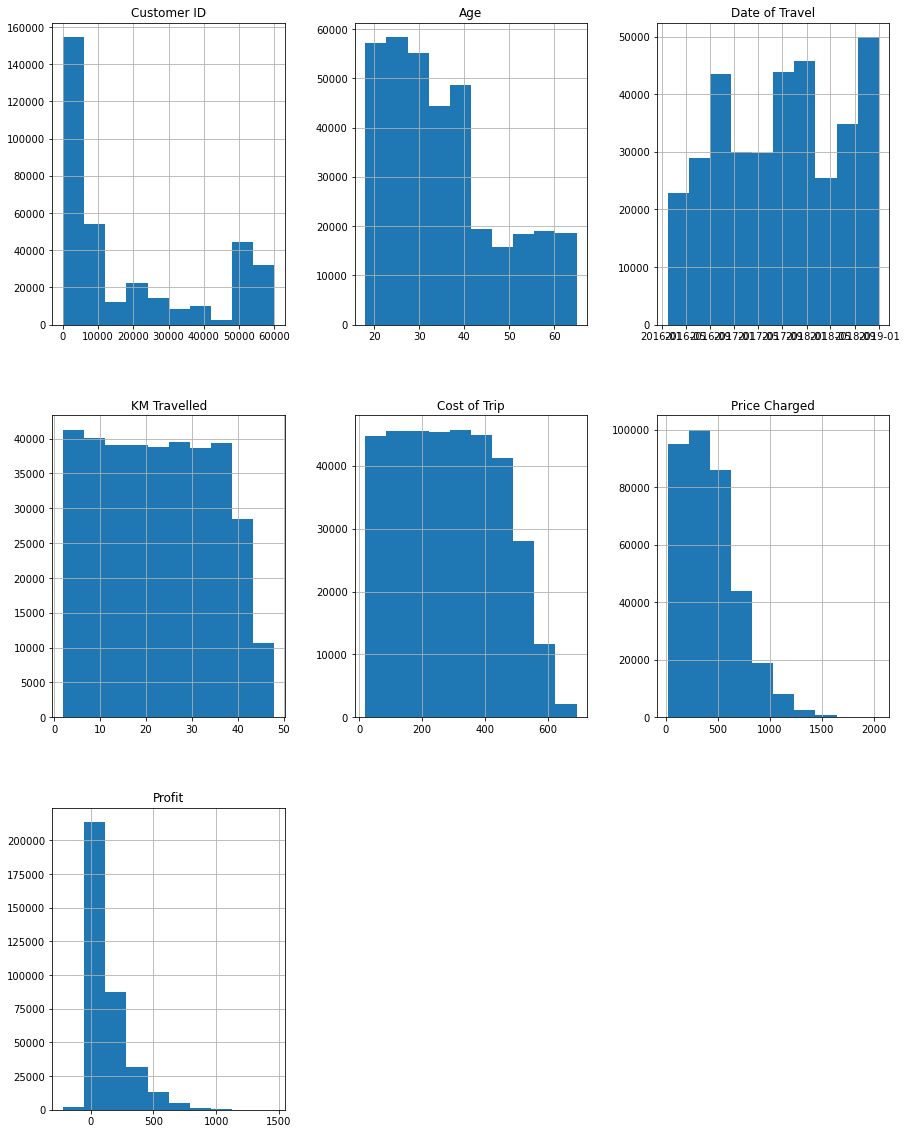

In [705]:
combined_df.hist(figsize= (15,20) )

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

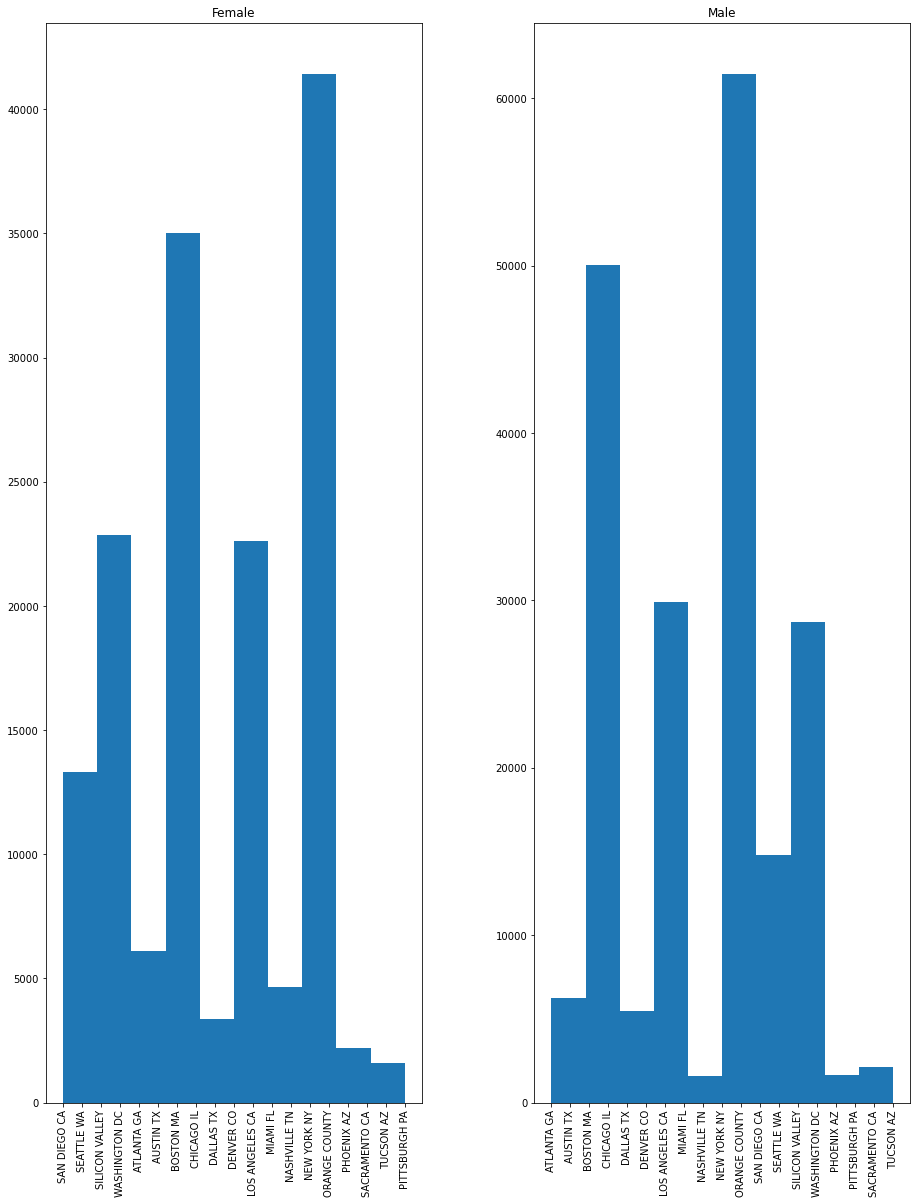

In [721]:
combined_df.hist(by= "Gender",column = "City", figsize= (15,20) )

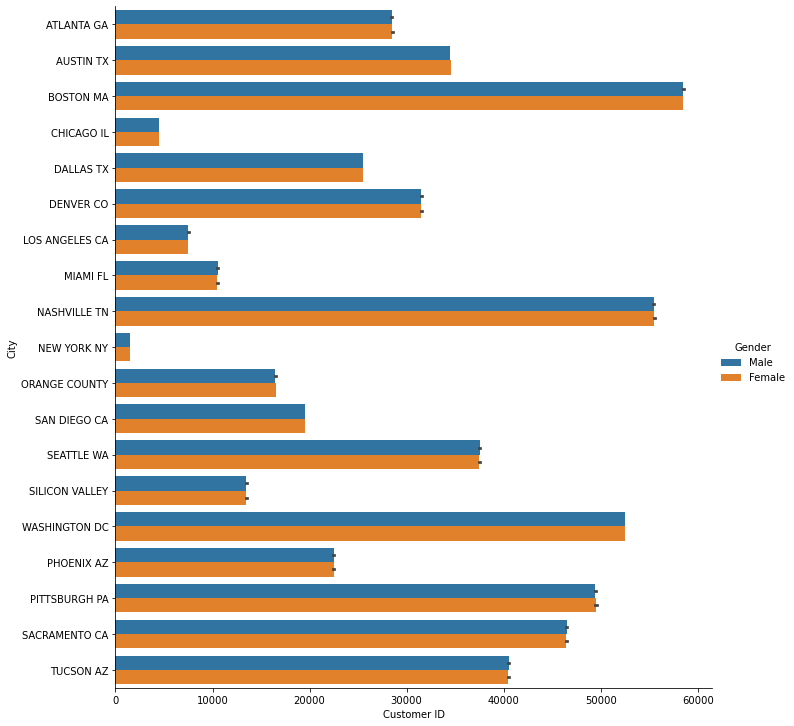

In [711]:
sns.catplot(x="Customer ID", y="City", hue="Gender", kind="bar", data=combined_df, height=10)

<AxesSubplot:xlabel='Company', ylabel='Profit'>

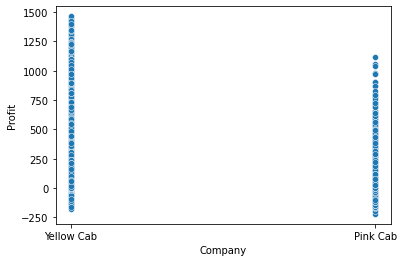

In [697]:
sns.scatterplot(x='Company', y = 'Profit', data = combined_df)

In [821]:
correlation= combined_df.corr()

In [822]:
correlation

,Customer ID,Age,KM Travelled,Cost of Trip,Price Charged,Profit
Customer ID,1.000000,-0.004710,0.000109,0.002818,-0.177805,-0.307488
Age,-0.004710,1.000000,-0.000132,0.000046,-0.002842,-0.004915
KM Travelled,0.000109,-0.000132,1.000000,0.981836,0.835963,0.461761
Cost of Trip,0.002818,0.000046,0.981836,1.000000,0.859982,0.484962
Price Charged,-0.177805,-0.002842,0.835963,0.859982,1.000000,0.863355
Profit,-0.307488,-0.004915,0.461761,0.484962,0.863355,1.000000


<AxesSubplot:>

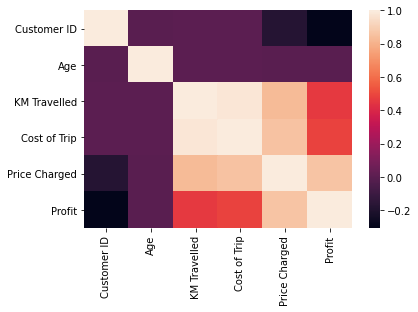

In [824]:
sns.heatmap(correlation, xticklabels= correlation.columns,
    yticklabels= correlation.columns,)

# After finishing the EDA, the insights can conclude that the Yellow Cab company is the right place to make the investment, due to the following reasons:

1- Yellow Cab revenue in years 2016 and 2018 is higher than Pink Cab.
<br>2- Yellow Cab attracts a larger number of customers.
<br>3- Yellow Cab has higher population all over the states which can be proved by the customers numbers in each state.
